<img style='width:50%; height:50%;' src='Data/Images/david-griffin-iso-no1-pick-0515.jpg'></img>

In [29]:
from bs4 import BeautifulSoup
from urllib.request import urlopen
import time
import os
import requests 

import pandas as pd
from pandas import DataFrame, read_csv
import scipy as sc
import numpy as np

import re

import seaborn as sns

import statsmodels.formula.api as sm
from sklearn.preprocessing import scale

import matplotlib.pyplot as plt 
plt.style.use('ggplot')
%matplotlib inline  
plt.rcParams['figure.figsize'] = (10, 6) 

In [3]:
draft = pd.DataFrame()
# stats.insert(0, 'Year', year)
# NBA season we will be analyzing
for year in range(1989 ,2019):

    # URL page we will scraping (see image above)
    url = "https://www.basketball-reference.com/draft/NBA_{}.html".format(year)
    
    html = urlopen(url)

    soup = BeautifulSoup(html)
    #     print(soup)
        # use findALL() to get the column headers
    soup.findAll('tr', limit=2)

        # use getText()to extract the text we need into a list
    headers = [th.getText() for th in soup.findAll('tr', limit=2)[1].findAll('th')][:]

        # exclude the first column as we will not need the ranking order from Basketball Reference for the analysis
    headers = headers[1:]

    # getting ID

    rows = soup.findAll('tr')[:]
    player_stats = [[td.getText() for td in rows[i].findAll('td')]
            for i in range(len(rows))]
    stats = pd.DataFrame(player_stats[2:], columns = headers)
    links = [[a for a in rows[i].findAll('a')]
            for i in range(0, len(rows))]
    playersHref = '(?:href=")([^"]+)'
    # linksCopy = (str)(links)
    ids = re.findall(playersHref, (str)(links))
    idsList = []
    idsList = []
    for i in range(0, len(ids)):
        if('players' in ids[i]):
            currID = ids[i].split('/')[3]
            idsList.append(currID.split('.')[0])
    stats = stats.assign(Year = year)
    stats.Player = stats.Player.astype(str)
    stats = stats[stats['Player']!='None']
#     stats['ID'] = idsList
#     stats = stats.drop_duplicates(subset = 'ID', keep='first')
    # stats = stats[]

    draft = pd.concat([draft, stats])

In [4]:
draft

,Pk,Tm,Player,College,Yrs,G,MP,PTS,TRB,AST,...,FT%,MP,PTS,TRB,AST,WS,WS/48,BPM,VORP,Year
0,1,SAC,Pervis Ellison,University of Louisville,11,474,11593,4494,3170,691,...,.689,24.5,9.5,6.7,1.5,21.8,.090,0.5,7.4,1989
1,2,LAC,Danny Ferry,Duke University,13,917,18133,6439,2550,1185,...,.840,19.8,7.0,2.8,1.3,34.8,.092,-0.9,5.0,1989
2,3,SAS,Sean Elliott,University of Arizona,12,742,24502,10544,3204,1897,...,.799,33.0,14.2,4.3,2.6,55.7,.109,0.6,16.1,1989
3,4,MIA,Glen Rice,University of Michigan,15,1000,34985,18336,4387,2097,...,.846,35.0,18.3,4.4,2.1,88.7,.122,0.5,22.1,1989
4,5,CHH,J.R. Reid,University of North Carolina,11,672,15370,5680,3381,639,...,.716,22.9,8.5,5.0,1.0,22.5,.070,-2.0,-0.2,1989
5,6,CHI,Stacey King,University of Oklahoma,8,438,7406,2819,1460,387,...,.707,16.9,6.4,3.3,0.9,10.9,.071,-3.0,-1.9,1989
6,7,IND,George McCloud,Florida State University,12,766,17429,6925,2342,1769,...,.810,22.8,9.0,3.1,2.3,24.6,.068,-0.7,5.6,1989
7,8,DAL,Randy White,Louisiana Tech University,5,281,5382,2083,1366,175,...,.707,19.2,7.4,4.9,0.6,1.9,.017,-4.4,-3.3,1989
8,9,WSB,Tom Hammonds,Georgia Institute of Technology,12,687,10419,3617,2243,378,...,.691,15.2,5.3,3.3,0.6,14.7,.068,-4.3,-6.0,1989
9,10,MIN,Pooh Richardson,"University of California, Los Angeles",10,639,19399,7083,1807,4180,...,.652,30.4,11.1,2.8,6.5,26.7,.066,-0.9,5.5,1989


In [5]:
draft.to_csv('Data/CSV Files/Database/DraftScrape.csv', index = False)

In [6]:
draft = pd.read_csv('Data/CSV Files/Database/DraftScrape.csv')

In [ ]:
# draft.head()

In [ ]:
col = ['Pk', 'Tm', 'Player', 'College', 'Yrs', 'G', 'MP', 'PTS', 'TRB', 'AST',
       'FG%', '3P%', 'FT%', 'MPAVG', 'PTSAVG', 'TRBAVG', 'ASTAVG', 'WS', 'WS/48', 'BPM',
       'VORP', 'Year']

In [ ]:
draft.columns = col
draft = draft.reindex(columns=['Year'] + list(col[:-1]))
draft

In [ ]:
draft.to_csv('Data/CSV Files/Database/DraftPicksScrape.csv', index=False)

In [30]:
draft = pd.read_csv('Data/CSV Files/Database/DraftPicksScrape.csv')
Ncaastats = pd.read_csv('Data/CSV Files/Database/playerAvgNCAA.csv')

In [31]:
draftedPlayers = draft.iloc[:, 3].to_list()
draftedPlayers

['Pervis Ellison',
 'Danny Ferry',
 'Sean Elliott',
 'Glen Rice',
 'J.R. Reid',
 'Stacey King',
 'George McCloud',
 'Randy White',
 'Tom Hammonds',
 'Pooh Richardson',
 'Nick Anderson',
 'Mookie Blaylock',
 'Michael Smith',
 'Tim Hardaway',
 'Todd Lichti',
 'Dana Barros',
 'Shawn Kemp',
 'B.J. Armstrong',
 'Kenny Payne',
 'Jeff Sanders',
 'Blue Edwards',
 'Byron Irvin',
 'Roy Marble',
 'Anthony Cook',
 'John Morton',
 'Vlade Divac',
 'Kenny Battle',
 'Sherman Douglas',
 'Dyron Nix',
 'Frank Kornet',
 'Jeff Martin',
 'Stanley Brundy',
 'Jay Edwards',
 'Gary Leonard',
 'Pat Durham',
 'Clifford Robinson',
 'Michael Ansley',
 'Doug West',
 'Ed Horton',
 'Dino Radja',
 'Doug Roth',
 'Michael Cutright',
 'Chucky Brown',
 'Reggie Cross',
 'Scott Haffner',
 'Ricky Blanton',
 'Reggie Turner',
 'Junie Lewis',
 'Haywoode Workman',
 'Brian Quinnett',
 'Mike Morrison',
 'Greg Grant',
 'Jeff Hodge',
 'Toney Mack',
 'Derrick Coleman',
 'Gary Payton',
 'Mahmoud Abdul-Rauf',
 'Dennis Scott',
 'Kendall 

In [32]:
draftedCol = []
for i in range(0,len(Ncaastats)):
    currPlayer = Ncaastats['Player'].values[i]
    currDraft = draft[draft['Player'] == currPlayer]
    if (currDraft.shape[0] > 0):
        draftedCol.append(currDraft['Pk'].values[0])
    else:
        draftedCol.append('Undrafted')
Ncaastats['Draft'] = draftedCol
# Ncaastats['To'] = Ncaastats['To'].astype(int)
# Ncaastats['Player'] = '' + (str)(Ncaastats['Player']) + ' ' + (str)((int)(Ncaastats['To']))

In [34]:
Ncaastats.to_csv('Data/CSV Files/Database/FromCollegeToNBA.csv', index=False)

In [11]:
# draftedNcaa = pd.DataFrame()
# for i in range(0,len(Ncaastats['Player'])):
#     curr = Ncaastats['Draft'][i]
#     if(curr != 'Undrafted'):
#         stat = pd.DataFrame(Ncaastats[Ncaastats.index == i])
#         draftedNcaa = pd.concat([stat,draftedNcaa])
draftedNcaa = Ncaastats[Ncaastats['Draft'] != 'Undrafted']
draftedNcaa

,ID,Player,Years,From,To,Team,GP,MIN,FGM,FGA,...,ORB,DRB,REB,AST,STL,BLK,PTS,2P%,eFG%,Draft
2,456,Troy Bell,1.0,2003.0,2003.0,BC,31,38.645,7.226,16.387,...,1.548,3.032,4.581,3.710,2.258,0.226,25.194,48.367425,54.527979,16
3,452,Carmelo Anthony,1.0,2003.0,2003.0,SU,35,36.400,7.914,17.486,...,2.886,6.857,9.743,2.200,1.486,0.857,22.229,49.548772,49.834153,3
4,444,Mike Sweetney,1.0,2003.0,2003.0,GU,34,32.000,7.765,14.206,...,4.059,6.706,10.765,1.941,1.382,3.206,22.824,55.000708,54.660003,9
7,410,Andre Emmett,2.0,2003.0,2004.0,TTU,68,37.015,8.162,15.956,...,2.191,4.456,6.647,1.838,1.559,0.382,21.235,52.697659,52.397217,35
9,417,Luis Flores,2.0,2003.0,2004.0,MAN,61,37.492,7.525,16.770,...,1.393,3.410,4.803,2.246,1.934,0.246,24.311,48.137435,50.933214,55
12,450,Dwyane Wade,1.0,2003.0,2003.0,MU,33,32.061,7.606,15.182,...,1.818,4.515,6.333,4.394,2.152,1.303,21.515,51.859340,51.495192,5
13,292,Nick Collison,1.0,2003.0,2003.0,KU,38,32.421,7.395,13.342,...,3.289,6.711,10.000,2.211,1.158,1.947,18.474,57.146330,56.708140,12
14,57,Chris Kaman,1.0,2003.0,2003.0,CMU,31,34.032,7.871,12.645,...,3.613,8.419,12.032,1.258,0.613,3.161,22.419,62.245947,62.245947,6
16,474,Willie Green,1.0,2003.0,2003.0,UDM,30,34.033,8.133,16.600,...,1.067,3.867,4.933,2.467,1.333,0.433,22.600,51.751294,52.707831,41
20,403,Ricky Minard,2.0,2003.0,2004.0,MSU,58,32.810,7.500,15.552,...,1.500,5.966,7.466,4.552,2.121,0.552,22.138,54.455725,53.713349,48


In [12]:
draftedNcaa.to_csv('Data/CSV Files/Database/draftedNcaa.csv', index = False)

In [13]:
draft[draft['Player'] == 'Jameer Nelson']

,Year,Pk,Tm,Player,College,Yrs,G,MP,PTS,TRB,...,3P%,FT%,MPAVG,PTSAVG,TRBAVG,ASTAVG,WS,WS/48,BPM,VORP
862,2004,20,DEN,Jameer Nelson,Saint Joseph's University,14.0,878.0,24539.0,9940.0,2595.0,...,0.368,0.81,27.9,11.3,3.0,5.1,48.3,0.094,0.0,12.7


In [14]:
first82AvgCorr = draft.corr()
first82AvgCorr = first82AvgCorr.style.background_gradient(cmap='coolwarm').set_precision(4)
first82AvgCorr

,Year,Pk,Yrs,G,MP,PTS,TRB,AST,FG%,3P%,FT%,MPAVG,PTSAVG,TRBAVG,ASTAVG,WS,WS/48,BPM,VORP
Year,1,0.05793,-0.3622,-0.299,-0.2576,-0.2118,-0.2179,-0.189,-0.02158,0.1347,0.02183,-0.03706,-0.006117,-0.004573,-0.02441,-0.1984,-0.02232,0.004975,-0.1275
Pk,0.05793,1,-0.416,-0.4411,-0.4591,-0.4534,-0.4344,-0.3501,-0.1648,-0.09402,-0.1581,-0.552,-0.5403,-0.4681,-0.3433,-0.3985,-0.2112,-0.3394,-0.3218
Yrs,-0.3622,-0.416,1,0.9718,0.9108,0.8295,0.8087,0.6871,0.2571,0.1189,0.2498,0.6855,0.6005,0.5276,0.4328,0.7993,0.3652,0.5265,0.6172
G,-0.299,-0.4411,0.9718,1,0.9603,0.8837,0.846,0.7417,0.2611,0.1569,0.2811,0.7502,0.6688,0.566,0.4937,0.8524,0.3787,0.5568,0.6749
MP,-0.2576,-0.4591,0.9108,0.9603,1,0.9623,0.8718,0.8204,0.2248,0.1878,0.2865,0.8046,0.7613,0.5878,0.5785,0.9257,0.3638,0.5545,0.7931
PTS,-0.2118,-0.4534,0.8295,0.8837,0.9623,1,0.837,0.8146,0.2065,0.2073,0.2984,0.7832,0.826,0.5683,0.5874,0.9439,0.3554,0.5323,0.8414
TRB,-0.2179,-0.4344,0.8087,0.846,0.8718,0.837,1,0.562,0.3151,-0.01556,0.1246,0.6879,0.6503,0.8011,0.3266,0.879,0.3707,0.5206,0.7599
AST,-0.189,-0.3501,0.6871,0.7417,0.8204,0.8146,0.562,1,0.09173,0.245,0.2921,0.6628,0.6535,0.2981,0.8301,0.7857,0.2742,0.4558,0.7573
FG%,-0.02158,-0.1648,0.2571,0.2611,0.2248,0.2065,0.3151,0.09173,1,-0.04153,-0.0894,0.2841,0.2787,0.4567,0.0428,0.2486,0.7072,0.6036,0.1782
3P%,0.1347,-0.09402,0.1189,0.1569,0.1878,0.2073,-0.01556,0.245,-0.04153,1,0.3861,0.2932,0.3061,-0.1107,0.3319,0.1305,0.204,0.261,0.1295


In [15]:
selected = draft[['Pk', 'Player', 'PTSAVG', 'TRBAVG', 'ASTAVG', 'WS']]
selected['TotalAVG'] = selected['WS'] + selected['PTSAVG'] + selected['TRBAVG'] + selected['ASTAVG']
selected = selected[['Pk', 'Player', 'TotalAVG']]
selected

C:\Users\Moshe Gotam\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


,Pk,Player,TotalAVG
0,1,Pervis Ellison,39.5
1,2,Danny Ferry,45.9
2,3,Sean Elliott,76.8
3,4,Glen Rice,113.5
4,5,J.R. Reid,37.0
5,6,Stacey King,21.5
6,7,George McCloud,39.0
7,8,Randy White,14.8
8,9,Tom Hammonds,23.9
9,10,Pooh Richardson,47.1


In [16]:
selectedCorr = selected.corr()
selectedCorr = selectedCorr.style.background_gradient(cmap='coolwarm').set_precision(4)
selectedCorr

,Pk,TotalAVG
Pk,1,-0.4502
TotalAVG,-0.4502,1


Text(0, 0.5, 'Rating')

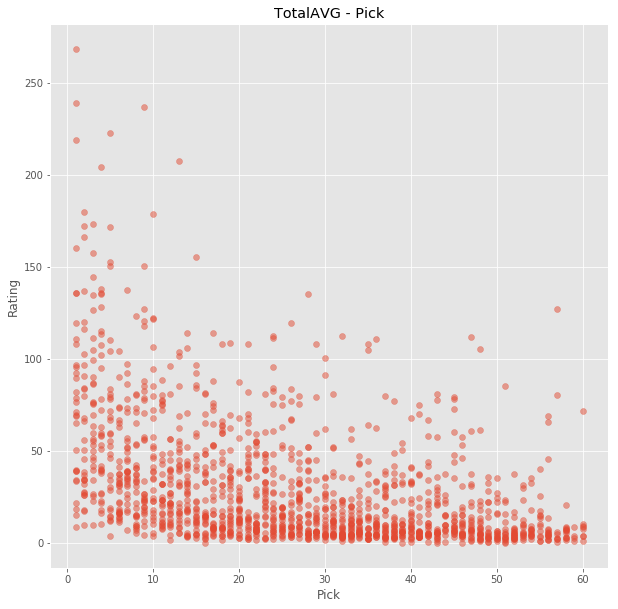

In [17]:
plt.rcParams['figure.figsize'] = (10,10)

plt.title('TotalAVG - Pick')
x = selected['Pk']
y = selected['TotalAVG']
plt.scatter(x, y, alpha=0.5)
plt.xlabel('Pick')
plt.ylabel('Rating')

In [18]:
pickListID = selected.drop_duplicates(subset = 'Pk', keep='first')
pickList = pickListID.iloc[:, 0].tolist()
pickListSize = len(pickList)
print(pickListSize)

60


In [19]:
pickRating = pd.DataFrame()
valueCount = []
for p in range(1, 61):
    currPick = selected[selected['Pk'] == p]
    numOfPlayers = currPick.shape[0]
    valueCount = []
    valueCount.append(p)
    valueCount.append(currPick['TotalAVG'].sum() / numOfPlayers)
    valueCount = pd.DataFrame(valueCount)
    valueCount = pd.DataFrame(valueCount.transpose())
    valueCount.columns = ['Pick', 'Total Rating']
    pickRating = pd.concat([pickRating, valueCount])
pickRating.index = pickRating['Pick']
# pickRating['Total Rating'] = scale(pickRating['Total Rating'])
pickRating

,Pick,Total Rating
Pick,,
1.0,1.0,89.446667
2.0,2.0,69.286667
3.0,3.0,74.833333
4.0,4.0,70.400000
5.0,5.0,66.256667
6.0,6.0,37.376667
7.0,7.0,48.896667
8.0,8.0,37.020000
9.0,9.0,57.540000


In [20]:
pickRating.Pick = pickRating.Pick.astype(int)

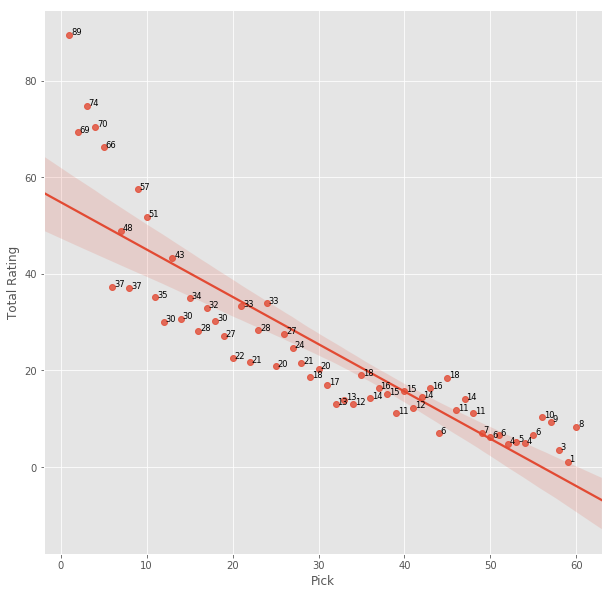

In [28]:
import matplotlib.lines as mlines

plt.rcParams['figure.figsize'] = (10,10)

plotRating = sns.regplot(pickRating['Pick'],pickRating['Total Rating'])
for line in range(0,pickRating.shape[0]):
     plotRating.text(pickRating['Pick'].values[line]+0.2, pickRating['Total Rating'].values[line], int(pickRating['Total Rating'].values[line]), horizontalalignment='left', size='small', color='black')

In [58]:
draft

,Pk,Tm,Player,College,Yrs,G,MP,PTS,TRB,AST,...,FT%,MP,PTS,TRB,AST,WS,WS/48,BPM,VORP,Year
0,1,SAC,Pervis Ellison,University of Louisville,11,474,11593,4494,3170,691,...,.689,24.5,9.5,6.7,1.5,21.8,.090,0.5,7.4,1989
1,2,LAC,Danny Ferry,Duke University,13,917,18133,6439,2550,1185,...,.840,19.8,7.0,2.8,1.3,34.8,.092,-0.9,5.0,1989
2,3,SAS,Sean Elliott,University of Arizona,12,742,24502,10544,3204,1897,...,.799,33.0,14.2,4.3,2.6,55.7,.109,0.6,16.1,1989
3,4,MIA,Glen Rice,University of Michigan,15,1000,34985,18336,4387,2097,...,.846,35.0,18.3,4.4,2.1,88.7,.122,0.5,22.1,1989
4,5,CHH,J.R. Reid,University of North Carolina,11,672,15370,5680,3381,639,...,.716,22.9,8.5,5.0,1.0,22.5,.070,-2.0,-0.2,1989
5,6,CHI,Stacey King,University of Oklahoma,8,438,7406,2819,1460,387,...,.707,16.9,6.4,3.3,0.9,10.9,.071,-3.0,-1.9,1989
6,7,IND,George McCloud,Florida State University,12,766,17429,6925,2342,1769,...,.810,22.8,9.0,3.1,2.3,24.6,.068,-0.7,5.6,1989
7,8,DAL,Randy White,Louisiana Tech University,5,281,5382,2083,1366,175,...,.707,19.2,7.4,4.9,0.6,1.9,.017,-4.4,-3.3,1989
8,9,WSB,Tom Hammonds,Georgia Institute of Technology,12,687,10419,3617,2243,378,...,.691,15.2,5.3,3.3,0.6,14.7,.068,-4.3,-6.0,1989
9,10,MIN,Pooh Richardson,"University of California, Los Angeles",10,639,19399,7083,1807,4180,...,.652,30.4,11.1,2.8,6.5,26.7,.066,-0.9,5.5,1989


In [63]:
draftLong = draft[['Pk', 'Yrs']]
draftLong = draftLong.replace(r'^\s*$', 0, regex=True)
draftLong.head()

,Pk,Yrs
0,1,11
1,2,13
2,3,12
3,4,15
4,5,11


In [65]:
draftLong.Pk = draftLong.Pk.astype(int)
draftLong.Yrs = draftLong.Yrs.astype(int)

In [67]:
draftLongPlot = pd.DataFrame()
for x in range(1, 61):
    values = []
    currPick = draftLong[draftLong['Pk'] == x]
    values.append(x)
    values.append(currPick.Yrs.sum())
    values.append(currPick.shape[0])
    values = pd.DataFrame(values)
    values = pd.DataFrame(values.transpose())
    values.columns = ['Pick', 'Years', 'Number Of Players']
    draftLongPlot = pd.concat([draftLongPlot, values])
draftLongPlot.head()

,Pick,Years,Number Of Players
0,1,310,30
0,2,301,30
0,3,301,30
0,4,312,30
0,5,317,30


In [68]:
draftLongPlot['Mean of Years'] = draftLongPlot['Years'] / draftLongPlot['Number Of Players']
draftLongPlot.head(10)

,Pick,Years,Number Of Players,Mean of Years
0,1,310,30,10.333333
0,2,301,30,10.033333
0,3,301,30,10.033333
0,4,312,30,10.400000
0,5,317,30,10.566667
0,6,214,30,7.133333
0,7,279,30,9.300000
0,8,244,30,8.133333
0,9,270,30,9.000000
0,10,285,30,9.500000


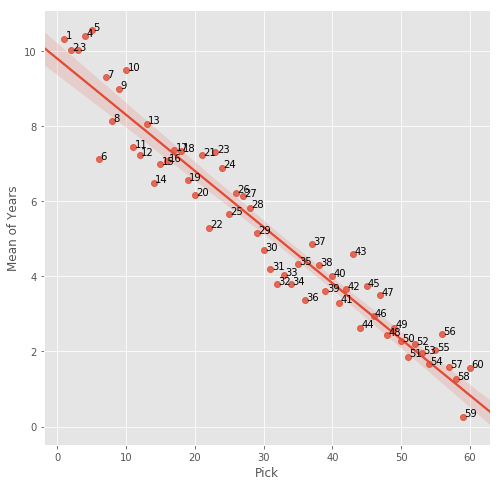

In [87]:
plotDraft = sns.regplot(draftLongPlot['Pick'],draftLongPlot['Mean of Years'])
for line in range(0,draftLongPlot.shape[0]):
     plotDraft.text(draftLongPlot['Pick'].values[line]+0.2, draftLongPlot['Mean of Years'].values[line], draftLongPlot['Pick'].values[line], horizontalalignment='left', size='medium', color='black')